# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Min Liu
- Yoo Jin Chung
- Qin Li
- Cesar Reyes
- J. Cole

## Group Members IDs

- A92061065
- A14692760
- A13803098
- A14078314

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
## YOUR CODE HERE
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns


# Data Cleaning

Describe your data cleaning steps here.

In [2]:
##
## The codes to load the original data sets, After the operation here, the reading values will be numerical 
##
income_summary = pd.read_csv("./household_income/Summary_2017_1984.csv", thousands=',')
income_summary = income_summary.rename(index=str, columns={'State': 'state'})
obesity_summary = pd.read_csv("./obesity_rate.csv")
obesity_summary = obesity_summary.rename(index=str, columns={'States': 'state'})
del obesity_summary['Unnamed: 0']
health_summary = pd.read_csv("./healthcare/healthcare_in_one.csv")
health_summary


,state,2014,2013,2012,2011,2010,2009,2008,2007,2006,...,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991
0,United States,8045,7703,7535,7292,7094,6892,6612,6370,6048,...,4118,3893,3720,3556,3406,3266,3117,2996,2852,2672
1,Alabama,7281,6996,6821,6541,6421,6325,6097,5928,5755,...,3932,3714,3601,3540,3336,3163,2991,2854,2716,2535
2,Alaska,11064,10428,10130,9586,9129,8745,8447,7975,7476,...,4566,4112,3848,3654,3411,3109,2865,2770,2646,2558
3,Arizona,6452,6262,6183,6076,6027,5874,5660,5410,5103,...,3226,3095,2962,2833,2801,2717,2677,2621,2506,2447
4,Arkansas,7408,6929,6804,6585,6412,6238,6000,5766,5469,...,3737,3547,3356,3227,3039,2896,2731,2604,2493,2363
5,California,7549,7256,7018,6737,6480,6210,6038,5776,5397,...,3578,3464,3372,3192,3130,3056,2993,2940,2839,2673
6,Colorado,6804,6472,6306,6129,5979,5882,5685,5522,5264,...,3769,3494,3350,3129,3026,2915,2788,2713,2636,2498
7,Connecticut,9859,9517,9300,8950,8863,8740,8219,7793,7391,...,5185,4957,4738,4463,4237,4106,3851,3651,3525,3315
8,Delaware,10254,9766,9433,9213,8822,8405,8136,7726,7315,...,4782,4567,4201,4027,3741,3638,3468,3234,3038,2837
9,District of Columbia,11944,11466,11223,11281,10876,10439,9959,9562,9003,...,6313,6275,6124,5943,5873,5659,5524,5443,5184,4660


In [3]:
## 
## we first sample on the three years 
##

data_2000 = income_summary[['state', '2000']]
data_2000 = data_2000.rename(index=str, columns={'2000':'income'})
data_2000 = pd.merge(data_2000, obesity_summary[['state','2000']], on=('state'))
data_2000 = data_2000.rename(index=str, columns={'2000':'obesity'})
data_2000 = pd.merge(data_2000, health_summary[['state','2000']], on=('state'))
data_2000 = data_2000.rename(index=str, columns={'2000':'health_cost'})

data_2010 = income_summary[['state', '2010']]
data_2010 = data_2010.rename(index=str, columns={'2010':'income'})
data_2010 = pd.merge(data_2010, obesity_summary[['state','2010']], on=('state'))
data_2010 = data_2010.rename(index=str, columns={'2010':'obesity'})
data_2010 = pd.merge(data_2010, health_summary[['state','2010']], on=('state'))
data_2010 = data_2010.rename(index=str, columns={'2010':'health_cost'})

data_1995 = income_summary[['state', '1995']]
data_1995 = data_1995.rename(index=str, columns={'1995':'income'})
data_1995 = pd.merge(data_1995, obesity_summary[['state','1995']], on=('state'))
data_1995 = data_1995.rename(index=str, columns={'1995':'obesity'})
data_1995 = pd.merge(data_1995, health_summary[['state','1995']], on=('state'))
data_1995 = data_1995.rename(index=str, columns={'1995':'health_cost'})

In [4]:
data_1995.dropna()
data_2000.dropna()
data_2010.dropna()
corr_1995 = data_1995.corr()
corr_2000 = data_2000.corr()
corr_2010 = data_2010.corr()
corr_2010

,income,obesity,health_cost
income,1.000000,-0.731681,0.368307
obesity,-0.731681,1.000000,-0.168063
health_cost,0.368307,-0.168063,1.000000


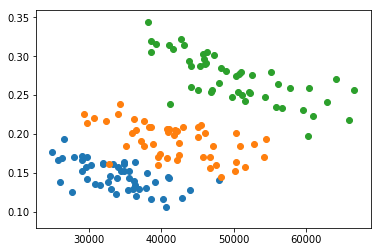

In [5]:
plt.scatter(data_1995['income'], data_1995['obesity'])
plt.scatter(data_2000['income'], data_2000['obesity'])
plt.scatter(data_2010['income'], data_2010['obesity'])


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [5]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*